# Modelado y Evaluación de Modelos  

En este notebook se entrena y evalúa el rendimiento de dos modelos de clasificación basados en técnicas de *Machine Learning*:  
**Árboles de Decisión** y **Random Forest**.  

In [42]:
# --- Imports ---
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay


## 1. Cargar dataset

Cargamos el dataset ya limpio y verificamos su estructura inicial.


In [43]:
df = pd.read_csv('../data/processed/adult_clean.csv')
df.head()

,age,fnlwgt,education,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## 2. Selección de variables predictoras y variable objetivo

En este paso se separan las variables que se utilizarán para entrenar los modelos.  
El objetivo es identificar claramente qué columnas se usarán como **características (X)** y cuál será la **variable objetivo (y)**.

- La variable **`income`** es el objetivo a predecir (0 = <=50K, 1 = >50K).  
- La columna **`fnlwgt`** se excluye porque representa un peso muestral del censo y no aporta información útil para la predicción.  

De esta forma, **X** contendrá únicamente las variables que describen a cada individuo (edad, educación, ocupación, horas trabajadas, etc.), mientras que **y** contendrá la etiqueta binaria de ingreso.


In [44]:
X = df.drop(['income', 'fnlwgt'], axis=1)
y = df['income']

## 3. División del conjunto de datos en entrenamiento y prueba

Para evaluar el rendimiento de los modelos de manera objetiva, dividimos el dataset en dos subconjuntos:

- **Conjunto de entrenamiento (train):** utilizado para ajustar los parámetros del modelo.  
- **Conjunto de prueba (test):** empleado para medir la capacidad del modelo de generalizar sobre datos nuevos.

La división se realiza con una proporción de **80% para entrenamiento** y **20% para prueba**, utilizando una semilla aleatoria fija (`random_state=42`) para asegurar la reproducibilidad de los resultados.


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Entrenamiento del modelo: Árbol de Decisión

Primero entrenamos un **Árbol de Decisión**, un modelo de clasificación que aprende reglas en forma de árbol para separar los datos según la variable objetivo.

Este modelo permite entender qué características influyen más en la predicción de ingresos y sirve como base para compararlo con modelos más complejos como Random Forest.

In [46]:
dtc = DecisionTreeClassifier(max_depth=12,random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

# Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.8535694521306032

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      6842
           1       0.75      0.60      0.67      2193

    accuracy                           0.85      9035
   macro avg       0.81      0.77      0.79      9035
weighted avg       0.85      0.85      0.85      9035



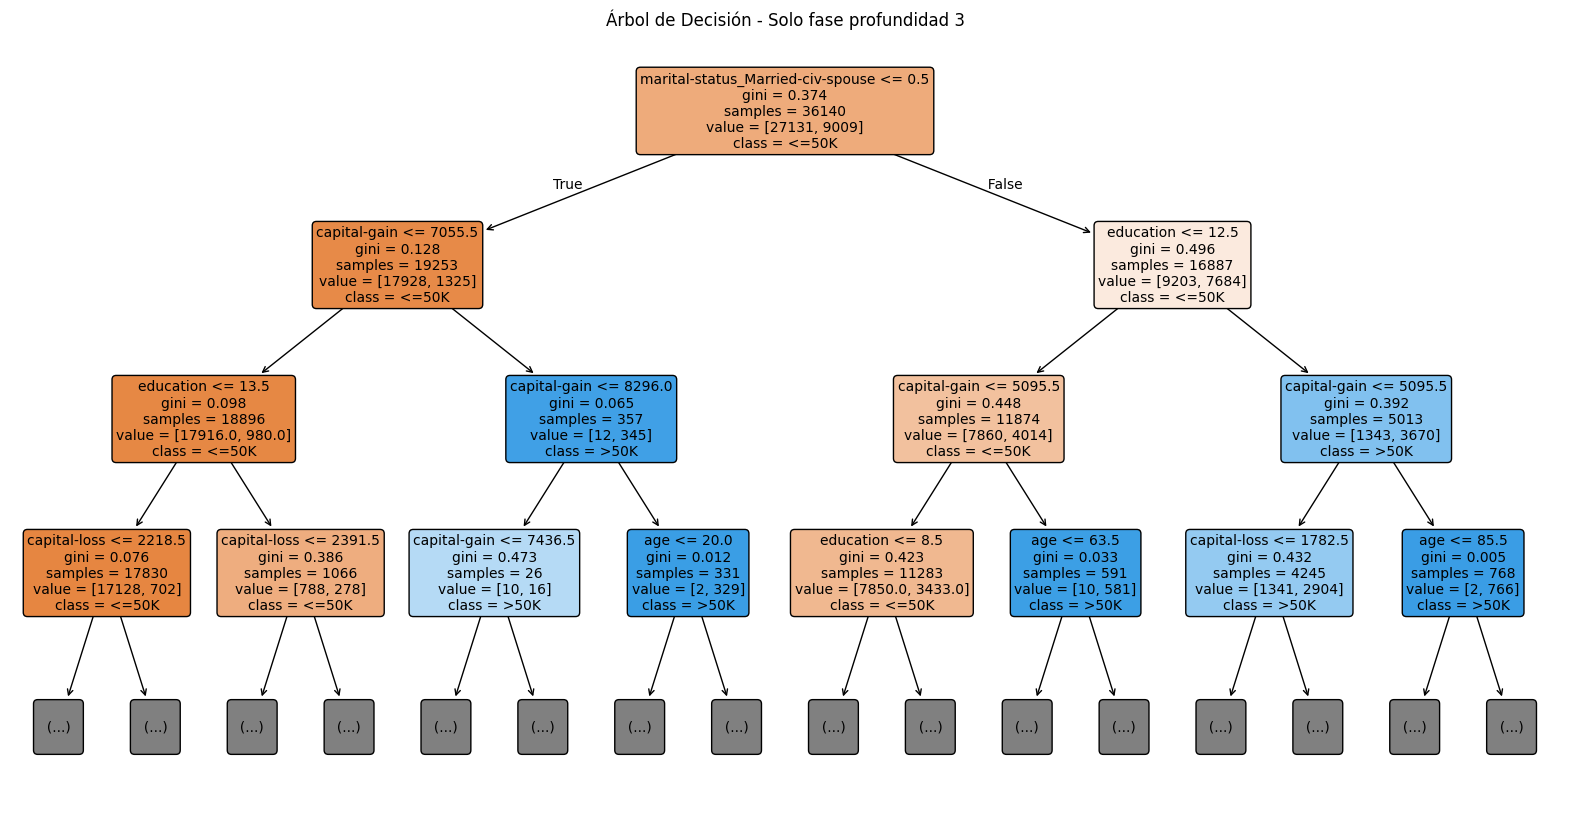

In [47]:
plt.figure(figsize=(20, 10))
plot_tree(
    dtc,
    max_depth=3,      # Mostrar hasta esta profundidad
    feature_names=X_train.columns,
    class_names=['<=50K', '>50K'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title(f"Árbol de Decisión - Solo fase profundidad 3")
plt.show()

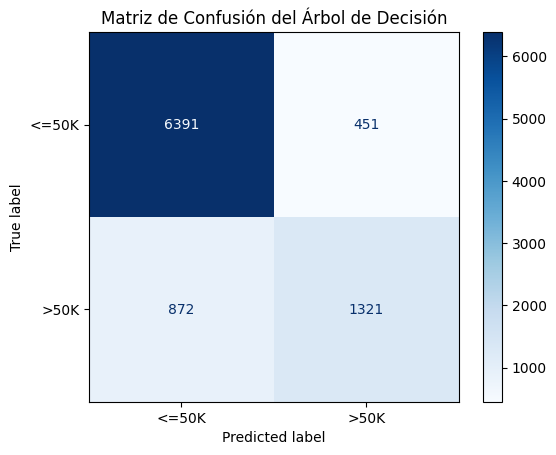

In [48]:
ConfusionMatrixDisplay.from_estimator(dtc, X_test, y_test, display_labels=['<=50K', '>50K'], cmap=plt.cm.Blues)
plt.title("Matriz de Confusión del Árbol de Decisión")
plt.show()

## 5. Entrenamiento del modelo: Random Forest

Entrenamos ahora un **Random Forest**, un modelo de ensamblado que combina múltiples árboles de decisión para mejorar la capacidad de generalización y reducir el sobreajuste.

A diferencia de un solo árbol, Random Forest construye varios árboles sobre subconjuntos aleatorios de datos y características, y promedia sus predicciones, logrando así un rendimiento más robusto.

In [49]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
# Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.8440509131156613

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90      6842
           1       0.70      0.63      0.66      2193

    accuracy                           0.84      9035
   macro avg       0.79      0.77      0.78      9035
weighted avg       0.84      0.84      0.84      9035



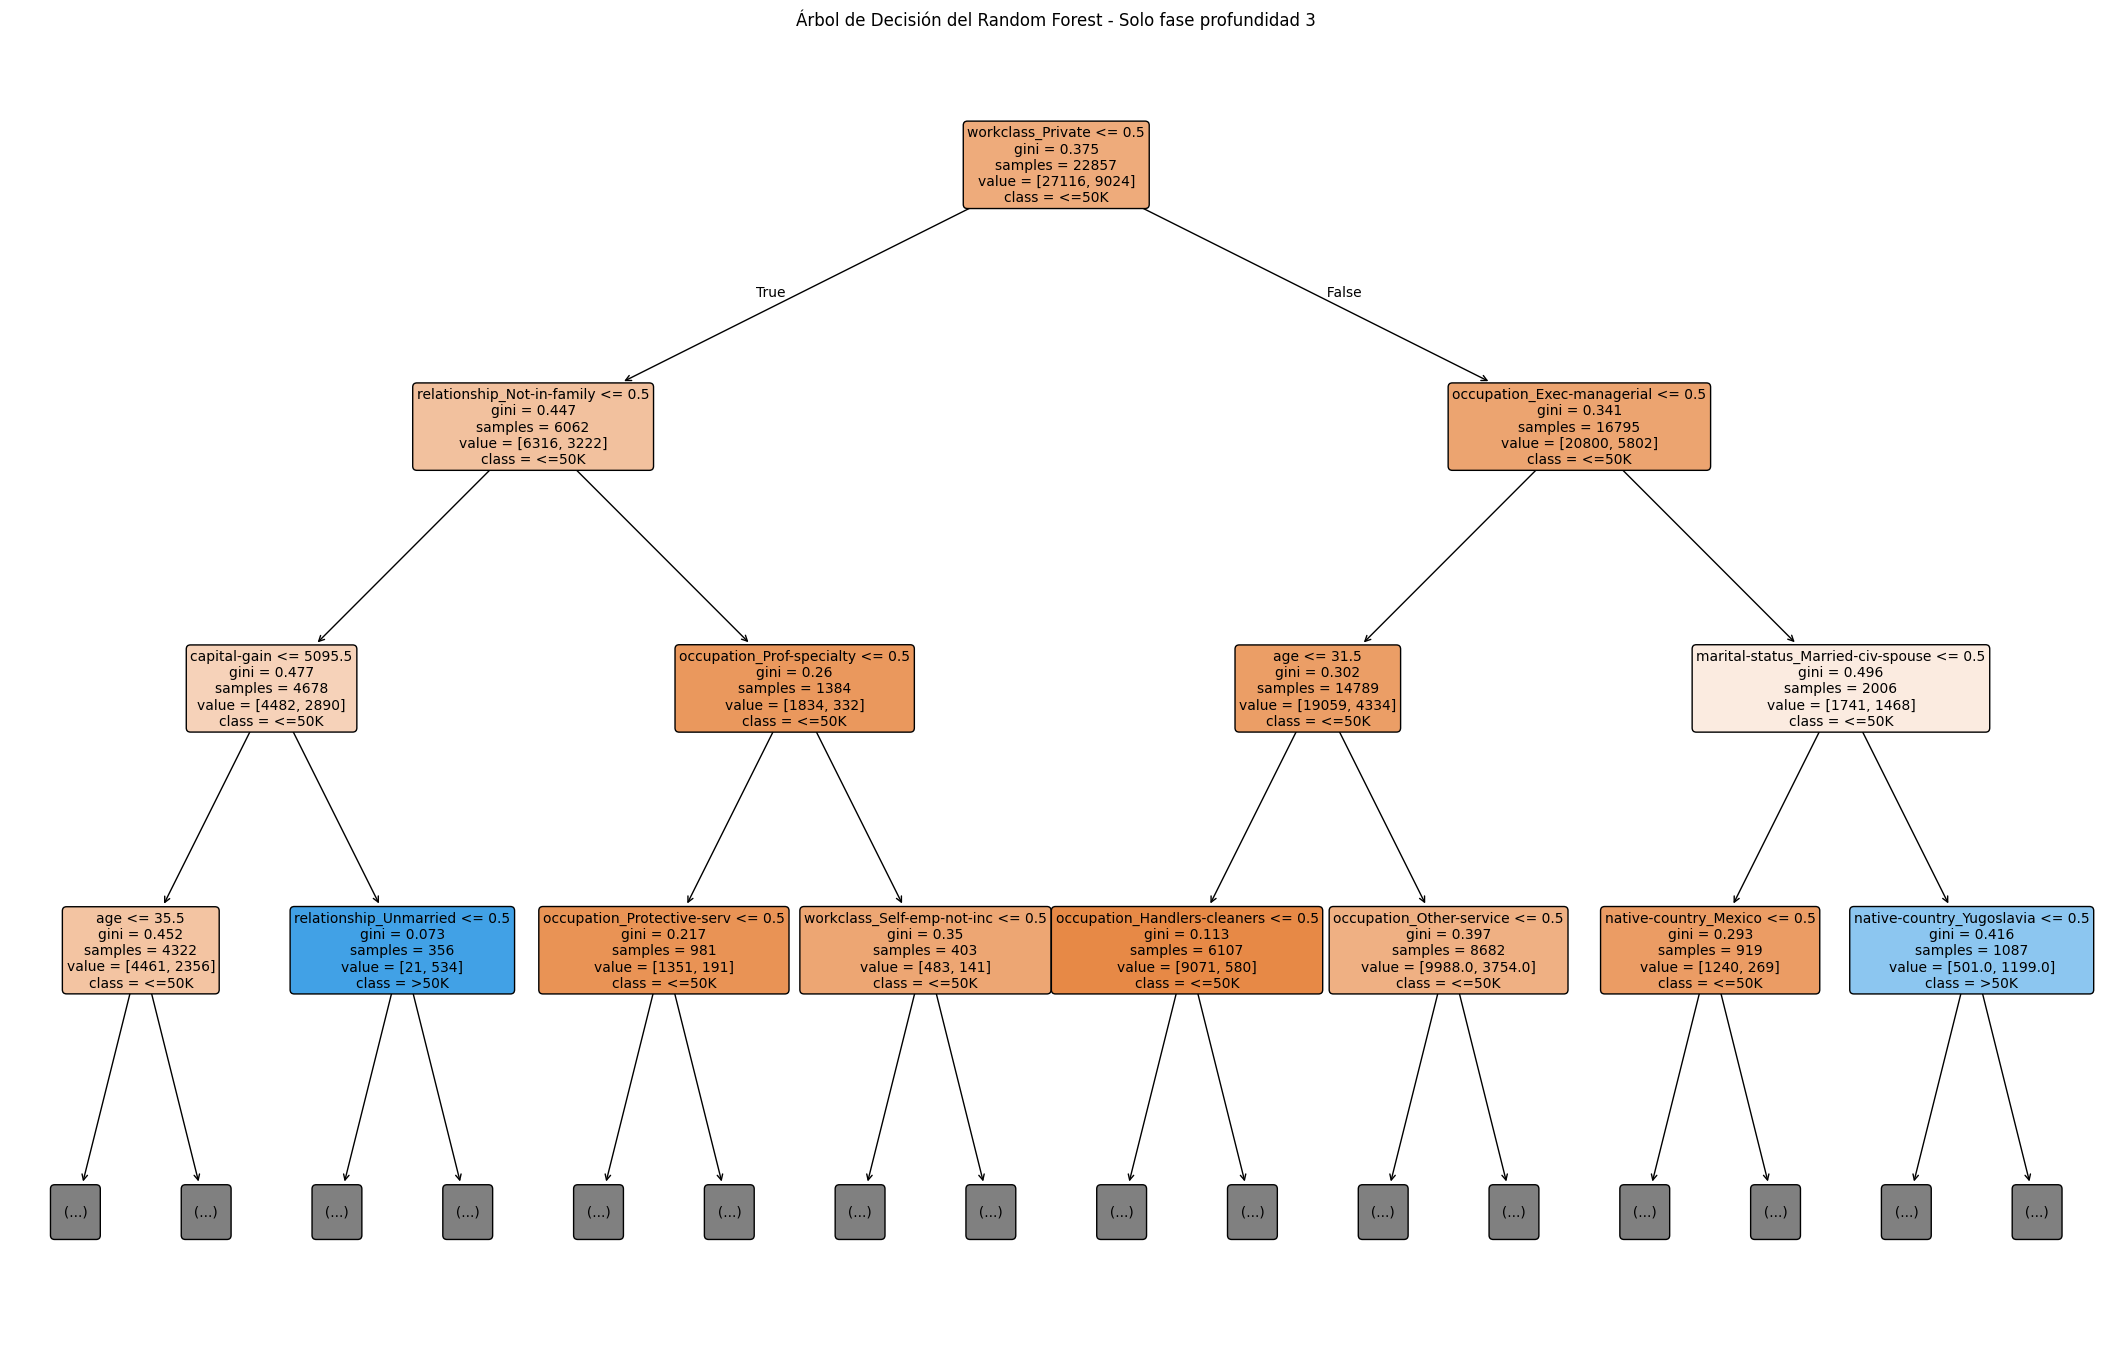

In [50]:
plt.figure(figsize=(27, 17))
plot_tree(
    rf.estimators_[0],
    max_depth=3,      # Mostrar hasta esta profundidad
    feature_names=X_train.columns,
    class_names=['<=50K', '>50K'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title(f"Árbol de Decisión del Random Forest - Solo fase profundidad 3")
plt.show()

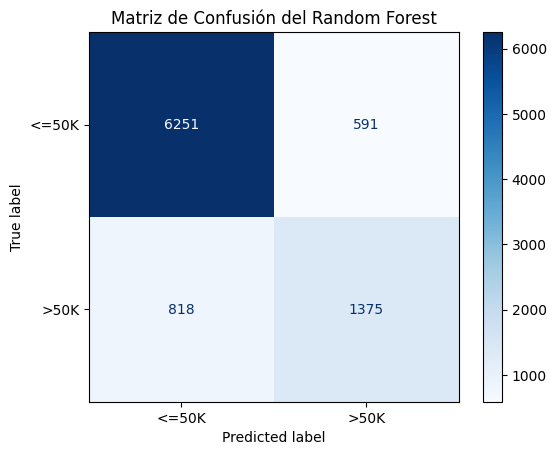

In [51]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, display_labels=['<=50K', '>50K'], cmap=plt.cm.Blues)
plt.title("Matriz de Confusión del Random Forest")
plt.show()


In [52]:
import joblib
import gzip

# Supongamos que tu modelo se llama 'rf'
# Guardar el modelo comprimido
with gzip.open('../models/random_forest.pkl.gz', 'wb') as f:
    joblib.dump(rf, f)

print("Modelo guardado y comprimido exitosamente.")


Modelo guardado y comprimido exitosamente.
